In [1]:
require 'Utils'
require 'Net1'
require 'VGG'

In [2]:
file_list = get_file_names();

In [3]:
print(#file_list)

10000	


In [4]:
im_batch = get_image_batch(5)

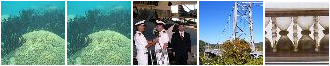

In [5]:
itorch.image(im_batch)


In [6]:
uv_images,y_images = create_yuv_images(im_batch)
print(uv_images:size())

  5
  2
 28
 28
[torch.LongStorage of size 4]



In [7]:
itorch.image(torch.cat(y_images,uv_images,2))

In [8]:
itorch.image(image.yuv2rgb(torch.cat(y_images[3],uv_images[3],1)))

In [9]:
require 'VGG';
require 'nn';
VGG_net = load_VGG();

Successfully loaded ../../Data/VGG_caffe/VGG_ILSVRC_16_layers.caffemodel


conv1_1: 64 3 3 3
conv1_2: 64 64 3 3
conv2_1: 128 64 3 3


conv2_2: 128 128 3 3
conv3_1: 256 128 3 3
conv3_2: 256 256 3 3


conv3_3: 256 256 3 3


conv4_1: 512 256 3 3


conv4_2: 512 512 3 3


conv4_3: 512 512 3 3


conv5_1: 512 512 3 3


conv5_2: 512 512 3 3


conv5_3: 512 512 3 3


fc6: 1 1 25088 4096


fc7: 1 1 4096 4096


fc8: 1 1 4096 1000


In [10]:
-- Defining a loss function
Weight = torch.ones(2,28,28)-- All ones matrix -- Bad coding
criterion = nn.WeightedMSECriterion(Weight)
print('MSEcriterion defined')

MSEcriterion defined	


In [11]:
function create_hypercolumn_dataset_random(num_images, layer_nums)
    local max_count = num_images;
    im_batch = get_image_batch(num_images)
    local count = 1;
    
    local hc_batch = nil;
    local hc_temp = get_VGG_hypercolumns(im_batch[count],VGG_net,layer_nums)
    local hc_size = hc_temp:size();
    hc_batch = hc_temp:reshape(1,hc_size[1], hc_size[2], hc_size[3] );
    
    for count=2,num_images do
        hc_temp = get_VGG_hypercolumns(im_batch[count],VGG_net,layer_nums)
        hc_temp = hc_temp:reshape(1,hc_size[1], hc_size[2], hc_size[3] );
        hc_batch = torch.cat(hc_batch, hc_temp,1)
    end
    return im_batch,hc_batch
    
end


In [12]:
local layer_nums = {3,9}
im_batch,hc_batch = create_hypercolumn_dataset_random(5, layer_nums);
hc_size = hc_batch:size()
num_hypercolumns = hc_size[2]
print(num_hypercolumns)

192	


In [13]:
net = BasicConvNet2();

In [14]:
local layer_nums = {3,9}
local num_images = 8;
decay = 0.95;
for i = 1,5 do
    im_batch,hc_batch = create_hypercolumn_dataset_random(5, layer_nums);
    hc_size = hc_batch:size()
    num_hypercolumns = hc_size[2]
    uv_images,y_images = create_yuv_images(im_batch)
    lr = 1;
    for j = 1,10 do
        loss = criterion:forward(net:forward(hc_batch), uv_images)
        print("batch: ".. i .. ") iter:" .. j .. " " .. loss)
        net:zeroGradParameters()
        net:backward(hc_batch, criterion:backward(net.output, uv_images))
        lr = lr*decay
        net:updateParameters(lr)
    end
end

batch: 1) iter:1 0.22772123715795	


batch: 1) iter:2 0.01770109404148	


batch: 1) iter:3 0.017694504822648	


batch: 1) iter:4 0.017687358360193	


batch: 1) iter:5 0.017679527563551	


batch: 1) iter:6 0.017670953205743	


batch: 1) iter:7 0.017661670268228	


batch: 1) iter:8 0.017651503258613	


batch: 1) iter:9 0.017640353768591	


batch: 1) iter:10 0.017628113717339	


batch: 2) iter:1 0.0082158431624992	


batch: 2) iter:2 0.0082152844530283	


batch: 2) iter:3 0.0082147751311337	


batch: 2) iter:4 0.0082143076421849	


batch: 2) iter:5 0.0082138754722162	


batch: 2) iter:6 0.0082134766616275	


batch: 2) iter:7 0.008213107006723	


batch: 2) iter:8 0.0082127644835694	


batch: 2) iter:9 0.0082124463933596	


batch: 2) iter:10 0.0082121501683215	


inconsistent tensor sizes at /home/kedart/torch/pkg/torch/lib/TH/generic/THTensorMath.c:1937
stack traceback:
	[C]: at 0x7f21c173bca0
	[C]: in function 'cat'
	./Utils.lua:104: in function 'get_image_batch'
	[string "function create_hypercolumn_dataset_random(nu..."]:3: in function 'create_hypercolumn_dataset_random'
	[string "local layer_nums = {3,9}..."]:5: in main chunk
	[C]: in function 'xpcall'
	/home/kedart/torch/install/share/lua/5.1/itorch/main.lua:209: in function </home/kedart/torch/install/share/lua/5.1/itorch/main.lua:173>
	/home/kedart/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/home/kedart/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/home/kedart/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/home/kedart/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/home/kedart/torch/install/share/lua/5.1/itorch/main.lua:381: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00406670: 

In [15]:
uv_op = net.output

In [16]:
itorch.image(torch.cat(y_images,uv_op,2))

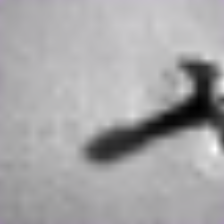

In [17]:
itorch.image(image.scale(image.yuv2rgb(torch.cat(y_images[5],uv_op[5],1)),224,224))

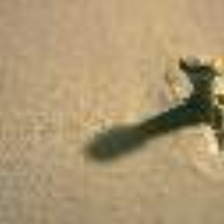

In [18]:
itorch.image(image.scale(im_batch[5],224,224))

In [20]:
print(uv_images)

(1,1,.,.) = 
 Columns 1 to 9
  0.0037  0.0035  0.0036  0.0035  0.0031  0.0027  0.0021 -0.0009 -0.0071
  0.0053  0.0037  0.0019  0.0005 -0.0014 -0.0048 -0.0069 -0.0102 -0.0102
  0.0118  0.0085  0.0025 -0.0031 -0.0092 -0.0147 -0.0194 -0.0242 -0.0163
  0.0184  0.0138  0.0035 -0.0085 -0.0175 -0.0267 -0.0350 -0.0413 -0.0178
  0.0236  0.0166  0.0046 -0.0104 -0.0247 -0.0324 -0.0486 -0.0481 -0.0117
  0.0303  0.0198  0.0046 -0.0158 -0.0327 -0.0494 -0.0610 -0.0490 -0.0055
  0.0366  0.0237  0.0068 -0.0154 -0.0288 -0.0603 -0.0642 -0.0387  0.0027
  0.0629  0.0224  0.0102  0.0047 -0.0395 -0.0643 -0.0337  0.0289  0.0059
  0.0421  0.0015  0.0021  0.0112 -0.0166 -0.0331  0.0008  0.0165 -0.0052
  0.0249 -0.0031 -0.0018  0.0113  0.0009 -0.0053  0.0273  0.0066 -0.0075
  0.0420  0.0067  0.0099  0.0134  0.0062  0.0003  0.0281  0.0109  0.0099
  0.0484  0.0123  0.0117  0.0196  0.0061  0.0005  0.0163  0.0148  0.0247
  0.0219 -0.0100  0.0037  0.0280  0.0153  0.0121  0.0267  0.0193  0.0447
 -0.0129 -0.0297 -0.01

0.0335 -0.0561 -0.0562 -0.0409 -0.0138

Columns 19 to 27
  0.0141 -0.0063 -0.0294 -0.0052  0.0027  0.0066  0.0092  0.0113  0.0107
  0.0088 -0.0051 -0.0184  0.0093  0.0165  0.0157  0.0099  0.0039 -0.0029
  0.0023  0.0037 -0.0047  0.0066  0.0110  0.0129  0.0083  0.0020 -0.0052
  0.0020  0.0082 -0.0011 -0.0309 -0.0231 -0.0094  0.0045  0.0059 -0.0002
  0.0141  0.0090 -0.0157 -0.0688 -0.0530 -0.0310 -0.0051  0.0015 -0.0006
  0.0315  0.0074 -0.0266 -0.0734 -0.0613 -0.0355 -0.0184 -0.0192 -0.0304
  0.0415  0.0101 -0.0197 -0.0476 -0.0437 -0.0308 -0.0272 -0.0412 -0.0628
  0.0058  0.0174  0.0347 -0.0031 -0.0076 -0.0084 -0.0145 -0.0289 -0.0454
 -0.0104  0.0072  0.0232  0.0127  0.0132  0.0073  0.0016 -0.0039 -0.0156
 -0.0120  0.0049  0.0204  0.0168  0.0169  0.0116  0.0073  0.0163  0.0062
  0.0074  0.0205  0.0221  0.0175  0.0120  0.0142  0.0213  0.0211  0.0130
  0.0257  0.0375  0.0342  0.0253  0.0247  0.0206  0.0238  0.0223  0.0110
  0.0303  0.0303  0.0289  0.0485  0.0529  0.0450  0.0376  0.0345  0

  0.0161  0.0197  0.0106 -0.0114 -0.0247 -0.0204  0.0019
  0.0056  0.0118  0.0213  0.0185 -0.0001 -0.0265 -0.0421 -0.0315 -0.0003
  0.0090  0.0174  0.0273  0.0229  0.0079 -0.0148 -0.0285 -0.0081  0.0337
  0.0040  0.0160  0.0316  0.0381  0.0285  0.0145  0.0028  0.0342  0.0783
 -0.0032  0.0124  0.0334  0.0494  0.0464  0.0361  0.0278  0.0641  0.1109

Columns 10 to 18
 -0.0044  0.0076  0.0184  0.0150  0.0028  0.0139  0.0068  0.0056  0.0170
 -0.0039  0.0063  0.0149  0.0110  0.0053  0.0161  0.0034 -0.0048  0.0037
 -0.0039  0.0050  0.0061  0.0037  0.0047  0.0192 -0.0001 -0.0161 -0.0104
  0.0033  0.0012 -0.0098 -0.0117 -0.0017  0.0186  0.0005 -0.0130 -0.0078
  0.0125  0.0016 -0.0207 -0.0318 -0.0147  0.0180  0.0080 -0.0007  0.0062
  0.0229 -0.0027 -0.0442 -0.0537 -0.0287  0.0161  0.0186  0.0230  0.0337
  0.0296  0.0004 -0.0518 -0.0644 -0.0376  0.0174  0.0305  0.0426  0.0526
  0.0174  0.0299 -0.0185 -0.0521 -0.0191  0.0331  0.0514  0.0483  0.0254
  0.0019  0.0211 -0.0166 -0.0473 -0.0210  0.0118 

808 -0.0671
  0.0345  0.0280  0.0117  0.0320  0.0569  0.0807  0.0245 -0.0229 -0.0216
  0.0345  0.0245  0.0071  0.0354  0.0668  0.0777  0.0488  0.0125  0.0074
  0.0263  0.0165 -0.0028  0.0266  0.0634  0.0580  0.0537  0.0385  0.0223
  0.0133  0.0075 -0.0087  0.0126  0.0509  0.0283  0.0413  0.0407  0.0136
 -0.0015 -0.0026 -0.0121  0.0023  0.0356  0.0083  0.0291  0.0389  0.0010

Columns 28 to 28
  0.0062
 -0.0066
 -0.0177
 -0.0064
 -0.0058
 -0.0336
 -0.0790
 -0.0551
 -0.0228
  0.0013
  0.0069
  0.0047
  0.0090
  0.0189
  0.0323
  0.0200
  0.0137
  0.0086
 -0.0112
 -0.0500
 -0.0914
 -0.1010
 -0.0607
 -0.0100
  0.0273
  0.0469
  0.0428
  0.0306

(3,1,.,.) = 
 Columns 1 to 9
  0.0619  0.0619  0.0602  0.0565  0.0548  0.0531  0.0534  0.0638  0.0613
  0.0615  0.0619  0.0603  0.0574  0.0551  0.0540  0.0524  0.0536  0.0507
  0.0601  0.0601  0.0575  0.0544  0.0529  0.0514  0.0493  0.0406  0.0353
  0.0544  0.0531  0.0508  0.0498  0.0464  0.0453  0.0423  0.0260  0.0209
  0.0420  0.0407  0.0392  0.036

.0017  0.0066  0.0133  0.0164
  0.0025  0.0032  0.0001 -0.0075 -0.0093  0.0051  0.0145  0.0240  0.0268
  0.0067  0.0060  0.0005 -0.0076 -0.0097  0.0075  0.0188  0.0292  0.0304
  0.0086  0.0098  0.0098  0.0100  0.0097  0.0061  0.0112  0.0182  0.0200
  0.0103  0.0089  0.0073  0.0062  0.0039  0.0005  0.0039  0.0113  0.0161
  0.0136  0.0091  0.0048 -0.0003 -0.0047 -0.0078 -0.0045  0.0037  0.0101
  0.0192  0.0128  0.0062  0.0008 -0.0032 -0.0101 -0.0088 -0.0037  0.0038
  0.0268  0.0219  0.0170  0.0137  0.0094 -0.0047 -0.0063 -0.0071 -0.0034
  0.0350  0.0320  0.0312  0.0303  0.0276  0.0067  0.0006 -0.0067 -0.0089
  0.0374  0.0405  0.0417  0.0419  0.0411  0.0145  0.0042 -0.0065 -0.0112

Columns 19 to 27
 -0.0051 -0.0042 -0.0012  0.0005 -0.0136 -0.0318 -0.0425 -0.0415 -0.0318
 -0.0114 -0.0096 -0.0061 -0.0060 -0.0170 -0.0315 -0.0411 -0.0390 -0.0290
 -0.0184 -0.0171 -0.0142 -0.0129 -0.0206 -0.0298 -0.0364 -0.0325 -0.0236
 -0.0220 -0.0213 -0.0196 -0.0175 -0.0215 -0.0244 -0.0244 -0.0195 -0.0121
 -0

-0.0332 -0.0332 -0.0320 -0.0329 -0.0375 -0.0357
 -0.0338 -0.0362 -0.0363 -0.0365 -0.0364 -0.0364 -0.0364 -0.0402 -0.0374
 -0.0418 -0.0417 -0.0412 -0.0414 -0.0417 -0.0419 -0.0419 -0.0438 -0.0399
 -0.0442 -0.0441 -0.0443 -0.0444 -0.0446 -0.0445 -0.0442 -0.0460 -0.0419
 -0.0416 -0.0386 -0.0415 -0.0417 -0.0415 -0.0418 -0.0424 -0.0483 -0.0458
 -0.0358 -0.0343 -0.0362 -0.0360 -0.0360 -0.0365 -0.0374 -0.0494 -0.0474
 -0.0289 -0.0328 -0.0331 -0.0315 -0.0328 -0.0333 -0.0343 -0.0457 -0.0463
 -0.0355 -0.0371 -0.0388 -0.0389 -0.0379 -0.0391 -0.0374 -0.0246 -0.0358
 -0.0399 -0.0382 -0.0382 -0.0400 -0.0403 -0.0403 -0.0391 -0.0312 -0.0404
 -0.0406 -0.0406 -0.0392 -0.0401 -0.0392 -0.0406 -0.0405 -0.0431 -0.0486
 -0.0369 -0.0369 -0.0369 -0.0370 -0.0370 -0.0372 -0.0374 -0.0465 -0.0500
 -0.0277 -0.0277 -0.0277 -0.0277 -0.0277 -0.0277 -0.0293 -0.0364 -0.0363
 -0.0162 -0.0143 -0.0165 -0.0127 -0.0133 -0.0140 -0.0157 -0.0167 -0.0158
 -0.0085 -0.0085 -0.0082 -0.0084 -0.0063 -0.0073 -0.0081 -0.0061 -0.0070

Co

59
 -0.0582 -0.0671 -0.0741 -0.0746 -0.0727 -0.0692 -0.0605 -0.0620 -0.0563
 -0.0555 -0.0594 -0.0661 -0.0534 -0.0550 -0.0541 -0.0524 -0.0494 -0.0498
 -0.0584 -0.0658 -0.0702 -0.0495 -0.0481 -0.0497 -0.0439 -0.0481 -0.0465
 -0.0626 -0.0713 -0.0776 -0.0675 -0.0667 -0.0636 -0.0598 -0.0587 -0.0566
 -0.0651 -0.0747 -0.0836 -0.0908 -0.0891 -0.0829 -0.0749 -0.0669 -0.0617
 -0.0652 -0.0768 -0.0863 -0.0991 -0.0957 -0.0841 -0.0707 -0.0561 -0.0455
 -0.0623 -0.0753 -0.0752 -0.0968 -0.0920 -0.0764 -0.0570 -0.0385 -0.0245
 -0.0621 -0.0535 -0.0484 -0.0971 -0.0905 -0.0705 -0.0487 -0.0338 -0.0264
 -0.0537 -0.0497 -0.0512 -0.0679 -0.0630 -0.0550 -0.0505 -0.0428 -0.0492
 -0.0510 -0.0479 -0.0558 -0.0424 -0.0400 -0.0431 -0.0502 -0.0531 -0.0660
 -0.0471 -0.0531 -0.0527 -0.0414 -0.0354 -0.0431 -0.0454 -0.0473 -0.0484
 -0.0303 -0.0367 -0.0403 -0.0445 -0.0435 -0.0409 -0.0345 -0.0249 -0.0165
 -0.0116 -0.0135 -0.0169 -0.0189 -0.0228 -0.0261 -0.0208 -0.0152 -0.0064
 -0.0005  0.0012  0.0027  0.0109  0.0051 -0.0069

0746 -0.0770 -0.0768
 -0.0771 -0.0809 -0.0828 -0.0848 -0.0844 -0.0739 -0.0765 -0.0808 -0.0803
 -0.0747 -0.0773 -0.0804 -0.0827 -0.0822 -0.0739 -0.0787 -0.0845 -0.0839
 -0.0687 -0.0714 -0.0731 -0.0766 -0.0771 -0.0732 -0.0796 -0.0874 -0.0871
 -0.0678 -0.0698 -0.0719 -0.0733 -0.0737 -0.0761 -0.0828 -0.0877 -0.0854
 -0.0816 -0.0863 -0.0861 -0.0840 -0.0831 -0.0905 -0.0876 -0.0761 -0.0630
 -0.0810 -0.0821 -0.0794 -0.0725 -0.0679 -0.0696 -0.0677 -0.0608 -0.0529
 -0.0777 -0.0727 -0.0640 -0.0540 -0.0460 -0.0403 -0.0401 -0.0423 -0.0435
 -0.0721 -0.0655 -0.0546 -0.0400 -0.0317 -0.0227 -0.0244 -0.0319 -0.0410
 -0.0702 -0.0634 -0.0520 -0.0394 -0.0313 -0.0290 -0.0319 -0.0398 -0.0485
 -0.0681 -0.0643 -0.0559 -0.0453 -0.0391 -0.0505 -0.0534 -0.0577 -0.0601
 -0.0674 -0.0662 -0.0603 -0.0534 -0.0505 -0.0688 -0.0718 -0.0710 -0.0693
 -0.0650 -0.0665 -0.0672 -0.0684 -0.0693 -0.0711 -0.0709 -0.0709 -0.0709
 -0.0631 -0.0663 -0.0677 -0.0697 -0.0706 -0.0674 -0.0674 -0.0674 -0.0674
 -0.0622 -0.0649 -0.0663 -0.06

0.0889  0.1198  0.1230  0.1263  0.0466
 -0.0082 -0.0175 -0.0152  0.0342  0.0824  0.1149  0.1182  0.1232  0.0541
 -0.0413 -0.0297 -0.0464  0.0271  0.1246  0.1097  0.0659 -0.0155  0.0093
 -0.0482 -0.0111 -0.0185 -0.0256  0.0892  0.1581  0.0386 -0.0165  0.0083
 -0.0198 -0.0183 -0.0091 -0.0414  0.0178  0.1102  0.0343 -0.0092 -0.0057
 -0.0098 -0.0047 -0.0175 -0.0357 -0.0329 -0.0046  0.0187 -0.0323 -0.0331
 -0.0132  0.1035  0.0391 -0.0451 -0.0478 -0.0482 -0.0258 -0.0467 -0.0382
  0.0312  0.1871  0.1536  0.0034 -0.0416 -0.0374 -0.0471 -0.0269  0.0119
  0.0939  0.1753  0.2425  0.1154 -0.0342 -0.0264 -0.0117  0.0462  0.0768
  0.0250  0.1041  0.2121  0.1962  0.0283  0.0336  0.1233  0.2151  0.1128
  0.0374  0.1070  0.1734  0.2680  0.2009  0.2260  0.1764  0.0917  0.0542
  0.0214  0.0839  0.0912  0.2355  0.2977  0.3125  0.1851  0.0775  0.0241
 -0.0068  0.1268  0.0522  0.1275  0.2492  0.1353  0.1104  0.1141  0.1020
  0.0497  0.1213  0.1681  0.0849  0.1075  0.0482  0.0366  0.0246  0.0806
  0.0537  0.

96  0.0315  0.0709  0.1168  0.1388  0.0698  0.0170  0.0682  0.1190
 -0.0682 -0.0068  0.0377  0.1015  0.1390  0.0792  0.0164  0.0852  0.1442
 -0.1007  0.0167  0.0403  0.0294  0.0593  0.0263  0.0007  0.0652  0.1290
  0.0541 -0.0108 -0.0339  0.0049  0.0463  0.0204 -0.0073  0.0382  0.0774
  0.1567 -0.0198 -0.0722 -0.0292  0.0199  0.0093 -0.0141  0.0159  0.0274
  0.1359  0.0061 -0.0734 -0.0735 -0.0211 -0.0156 -0.0326  0.0057  0.0200
  0.1046  0.0396 -0.0755 -0.0972 -0.0429 -0.0391 -0.0546 -0.0067  0.0180
  0.1002  0.0771  0.0016 -0.0390 -0.0117 -0.0405 -0.0777 -0.0343 -0.0030
  0.0950  0.1135  0.1132  0.0431  0.0414 -0.0079 -0.0778 -0.0512 -0.0218
  0.1537  0.1003  0.0082  0.0443  0.0747  0.1244  0.0457 -0.0166  0.0539
  0.1299  0.0539  0.0120 -0.0030  0.0494  0.1737  0.1480  0.0792  0.0613
  0.0992  0.0153  0.0263  0.0277  0.0298  0.1134  0.1315  0.1153  0.0980
  0.0885  0.0081  0.0019  0.0176  0.0019  0.0579  0.0945  0.1082  0.1025
  0.0943  0.0148 -0.0157  0.0113 -0.0027  0.0525  0.0695 

076 -0.0073
 -0.0038 -0.0155 -0.0167 -0.0123 -0.0028 -0.0290 -0.0312 -0.0231 -0.0181
 -0.0153 -0.0229 -0.0168 -0.0077 -0.0049 -0.0208 -0.0251 -0.0257 -0.0147
 -0.0214 -0.0188  0.0033  0.0165  0.0129  0.0082 -0.0005 -0.0092 -0.0006
 -0.0108 -0.0019  0.0411  0.0630  0.0534  0.0314  0.0099 -0.0077 -0.0064
 -0.0065  0.0198  0.0888  0.1160  0.0964  0.0263 -0.0098 -0.0396 -0.0411
 -0.0002  0.0311  0.1109  0.1503  0.1275  0.0101 -0.0383 -0.0765 -0.0898
  0.0026 -0.0158  0.0413  0.1351  0.1371  0.0073 -0.0460 -0.0458 -0.0398
 -0.0059 -0.0214  0.0424  0.0987  0.0581 -0.0316 -0.0449  0.0488  0.1756
 -0.0313 -0.0082  0.0777  0.0648 -0.0154 -0.0188 -0.0223  0.0548  0.2362
 -0.0521 -0.0057  0.0994  0.0691 -0.0350 -0.0038  0.0059 -0.0128  0.0871
 -0.0533 -0.0148  0.0741  0.0630 -0.0355 -0.0466  0.0115 -0.0189 -0.0140
 -0.0064 -0.0314  0.0067  0.0198 -0.0405 -0.0620  0.0026  0.0432  0.0024
  0.0383 -0.0396 -0.0494 -0.0280 -0.0454 -0.0088  0.0237  0.0811  0.0325
  0.0272  0.0027 -0.0010 -0.0272 -0.051

91
  0.0678
  0.0929
  0.1156
  0.1163
  0.0470
 -0.0156
 -0.0246
 -0.0175
 -0.0281
 -0.0396
  0.0793
  0.0104
  0.0226
  0.0256
  0.0707
  0.1632
  0.1490
  0.1563
  0.1292
  0.0889
  0.0895
  0.1435
  0.1460
  0.0814

(3,2,.,.) = 
 Columns 1 to 9
  0.0248  0.0236  0.0207  0.0182  0.0151  0.0122  0.0127  0.0204  0.0167
  0.0267  0.0251  0.0239  0.0216  0.0187  0.0161  0.0138  0.0174  0.0131
  0.0272  0.0272  0.0259  0.0239  0.0212  0.0201  0.0146  0.0105  0.0060
  0.0261  0.0262  0.0232  0.0219  0.0176  0.0160  0.0114  0.0024 -0.0009
  0.0179  0.0166  0.0128  0.0102  0.0053  0.0034  0.0026 -0.0056 -0.0072
  0.0044  0.0039  0.0005 -0.0032 -0.0058 -0.0093 -0.0097 -0.0124 -0.0123
 -0.0025 -0.0046 -0.0085 -0.0114 -0.0145 -0.0166 -0.0174 -0.0193 -0.0177
  0.0070  0.0026  0.0016 -0.0014 -0.0036 -0.0068 -0.0113 -0.0218 -0.0203
  0.0094  0.0039  0.0025 -0.0002 -0.0024 -0.0040 -0.0096 -0.0176 -0.0188
  0.0088  0.0033  0.0025  0.0002 -0.0023 -0.0038 -0.0095 -0.0122 -0.0121
  0.0089  0.0037  0.0

-0.0013  0.0026  0.0024  0.0022  0.0023
 -0.0009  0.0040  0.0098  0.0142  0.0174  0.0192  0.0191  0.0193  0.0199
  0.0131  0.0209  0.0272  0.0326  0.0372  0.0346  0.0348  0.0351  0.0350
  0.0224  0.0285  0.0387  0.0460  0.0497  0.0464  0.0464  0.0464  0.0463

Columns 19 to 27
  0.0040  0.0020 -0.0026 -0.0056  0.0034  0.0114  0.0173  0.0197  0.0138
  0.0132  0.0068  0.0024 -0.0008  0.0077  0.0184  0.0238  0.0235  0.0176
  0.0214  0.0150  0.0102  0.0037  0.0117  0.0226  0.0288  0.0286  0.0239
  0.0243  0.0213  0.0129  0.0044  0.0120  0.0228  0.0295  0.0289  0.0242
  0.0205  0.0149  0.0093 -0.0000  0.0051  0.0166  0.0227  0.0229  0.0186
  0.0134  0.0072  0.0024 -0.0098 -0.0051  0.0053  0.0123  0.0117  0.0073
  0.0032  0.0017 -0.0044 -0.0207 -0.0122 -0.0021  0.0043  0.0026 -0.0038
 -0.0031 -0.0039 -0.0079 -0.0304 -0.0187 -0.0004  0.0093 -0.0005 -0.0180
 -0.0060 -0.0031 -0.0064 -0.0272 -0.0157 -0.0001  0.0092 -0.0001 -0.0163
 -0.0059 -0.0008 -0.0012 -0.0209 -0.0123  0.0004  0.0069  0.0008 -

1 -0.0057 -0.0165 -0.0256 -0.0352 -0.0343  0.0079 -0.0035
 -0.0030 -0.0028 -0.0032 -0.0047 -0.0064 -0.0076 -0.0082 -0.0117 -0.0037
  0.0029  0.0026  0.0025  0.0028  0.0026  0.0026  0.0021 -0.0034  0.0052
  0.0132  0.0132  0.0129  0.0128  0.0122  0.0125  0.0145  0.0146  0.0190
  0.0220  0.0220  0.0220  0.0220  0.0219  0.0220  0.0226  0.0258  0.0249
  0.0213  0.0213  0.0213  0.0213  0.0213  0.0213  0.0219  0.0304  0.0267
  0.0152  0.0148  0.0153  0.0144  0.0146  0.0147  0.0162  0.0276  0.0226
  0.0109  0.0109  0.0108  0.0108  0.0103  0.0105  0.0120  0.0236  0.0182

Columns 10 to 18
  0.0104  0.0064  0.0014 -0.0060 -0.0104 -0.0029 -0.0021 -0.0020 -0.0015
  0.0074  0.0036  0.0056  0.0100  0.0133  0.0089  0.0090  0.0104  0.0103
 -0.0012 -0.0045  0.0017  0.0210  0.0323  0.0139  0.0132  0.0138  0.0129
 -0.0075 -0.0103 -0.0038  0.0123  0.0225  0.0053  0.0027  0.0022  0.0016
  0.0245  0.0242  0.0212  0.0135  0.0106  0.0063  0.0044  0.0037  0.0046
  0.0989  0.1037  0.0806  0.0426  0.0168  0.0400

0640  0.0502
  0.0567  0.0702  0.0810  0.1230  0.1175  0.0997  0.0740  0.0496  0.0287
  0.0647  0.0747  0.0842  0.1119  0.1085  0.0965  0.0807  0.0635  0.0502
  0.0503  0.0603  0.0674  0.0692  0.0662  0.0592  0.0509  0.0393  0.0339
  0.0336  0.0390  0.0435  0.0301  0.0273  0.0252  0.0246  0.0207  0.0201
  0.0219  0.0224  0.0231  0.0177  0.0156  0.0212  0.0240  0.0258  0.0285
  0.0119  0.0117  0.0133  0.0214  0.0249  0.0261  0.0284  0.0321  0.0359
  0.0111  0.0062  0.0073  0.0182  0.0188  0.0181  0.0171  0.0188  0.0189
  0.0108  0.0050  0.0040  0.0069  0.0052  0.0019 -0.0015 -0.0036 -0.0077

Columns 28 to 28
  0.0095
  0.0105
  0.0020
 -0.0089
  0.0055
  0.0629
  0.1185
  0.1167
  0.0809
  0.0470
  0.0400
  0.0390
  0.0192
  0.0056
  0.0757
  0.0630
  0.0491
  0.0570
  0.0593
  0.0396
  0.0169
  0.0440
  0.0296
  0.0190
  0.0300
  0.0353
  0.0171
 -0.0082

(5,2,.,.) = 
 Columns 1 to 9
  0.0588  0.0588  0.0588  0.0588  0.0588  0.0588  0.0583  0.0682  0.0676
  0.0588  0.0588  0.0588  0.05

0.0518  0.0473  0.0376  0.0233
  0.0663  0.0592  0.0472  0.0323  0.0207  0.0100  0.0105  0.0120  0.0138
  0.0585  0.0494  0.0331  0.0136  0.0015 -0.0110 -0.0075  0.0014  0.0137
  0.0554  0.0461  0.0288  0.0121  0.0008 -0.0006  0.0064  0.0159  0.0291
  0.0528  0.0475  0.0350  0.0204  0.0118  0.0308  0.0368  0.0434  0.0489
  0.0536  0.0510  0.0432  0.0323  0.0283  0.0568  0.0607  0.0611  0.0612
  0.0619  0.0606  0.0600  0.0580  0.0564  0.0560  0.0547  0.0547  0.0547
  0.0612  0.0611  0.0605  0.0610  0.0597  0.0529  0.0519  0.0519  0.0519
  0.0577  0.0582  0.0585  0.0587  0.0588  0.0518  0.0518  0.0518  0.0518
  0.0551  0.0552  0.0552  0.0551  0.0551  0.0515  0.0515  0.0515  0.0515
  0.0497  0.0494  0.0499  0.0495  0.0500  0.0523  0.0523  0.0523  0.0523
  0.0487  0.0480  0.0480  0.0483  0.0485  0.0528  0.0528  0.0528  0.0528
  0.0488  0.0482  0.0476  0.0482  0.0483  0.0528  0.0528  0.0528  0.0528

Columns 19 to 27
  0.0684  0.0689  0.0688  0.0684  0.0680  0.0679  0.0682  0.0688  0.0683
  